In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

# import des bases de données

## exploration des tables:

In [3]:
title_principals=pd.read_csv("title.principals.tsv.gz", sep = "\t")
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [4]:
title_basics=pd.read_csv("title.basics.tsv.gz", sep = "\t")
title_basics.head()

C:\Users\simad\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
title_akas=pd.read_csv("title.akas.tsv.gz", sep = "\t")
title_akas.head()

C:\Users\simad\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [6]:
title_crew=pd.read_csv("title.crew.tsv.gz", sep = "\t")
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [7]:
title_episode=pd.read_csv("title.episode.tsv.gz", sep = "\t")
title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [8]:
name_basics=pd.read_csv("name.basics.tsv.gz", sep = "\t")
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0069467,tt0060827,tt0050986"


In [9]:
title_ratings=pd.read_csv("title.ratings.tsv.gz", sep = "\t")
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1696
1,tt0000002,6.0,210
2,tt0000003,6.5,1443
3,tt0000004,6.1,122
4,tt0000005,6.1,2243


# Netoyage de la base 


# je merge trois tables avreage rating et celle des titre avec celle qui contient les regions title id 

In [10]:
table_Film_Rating=pd.merge(left=title_basics, right=title_ratings, how='left')
table_Film_Rating

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,210.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1443.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,122.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2243.0
...,...,...,...,...,...,...,...,...,...,...,...
7783578,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
7783579,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
7783580,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
7783581,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short,NaN,NaN


In [11]:
table_Film_Rating_title= pd.merge(table_Film_Rating,title_akas, how='left', left_on='tconst', right_on='titleId')


In [12]:
table_Film_Rating_title.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0,tt0000001,1.0,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0,tt0000001,2.0,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0,tt0000001,3.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0,tt0000001,4.0,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1696.0,tt0000001,5.0,Карменсита,RU,\N,imdbDisplay,\N,0


In [13]:

table_Film_Rating_title.sort_values(by='runtimeMinutes', ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
14056935,tt1713719,tvEpisode,Episode dated 20 September 1990,Episode dated 20 September 1990,0,1990,\N,\N,"News,Talk-Show",NaN,NaN,tt1713719,6.0,Épisode datant du 20 septembre 1990,FR,fr,\N,\N,0
18039531,tt3728336,tvEpisode,Episode #18.157,Episode #18.157,0,2014,\N,\N,Talk-Show,NaN,NaN,tt3728336,2.0,Folge #18.157,DE,de,\N,\N,0
18039614,tt3728390,tvEpisode,Episode #1.2991,Episode #1.2991,0,2005,\N,\N,Talk-Show,NaN,NaN,tt3728390,2.0,Episodio #1.2991,ES,es,\N,\N,0
18039613,tt3728390,tvEpisode,Episode #1.2991,Episode #1.2991,0,2005,\N,\N,Talk-Show,NaN,NaN,tt3728390,1.0,एपिसोड #1.2991,IN,hi,\N,\N,0
18039596,tt3728362,tvEpisode,Una tragedia fiorentina di Alexander von Zemli...,Una tragedia fiorentina di Alexander von Zemli...,0,2014,\N,\N,"Documentary,Music",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,tt0000113,short,Rip's Twenty Years' Sleep,Rip's Twenty Years' Sleep,0,1896,\N,0,"Drama,Short",4.4,469.0,tt0000113,3.0,Rip's Twenty Years' Sleep,DE,\N,imdbDisplay,\N,0
547,tt0000113,short,Rip's Twenty Years' Sleep,Rip's Twenty Years' Sleep,0,1896,\N,0,"Drama,Short",4.4,469.0,tt0000113,2.0,Rip's Twenty Years' Sleep,\N,\N,original,\N,1
546,tt0000113,short,Rip's Twenty Years' Sleep,Rip's Twenty Years' Sleep,0,1896,\N,0,"Drama,Short",4.4,469.0,tt0000113,1.0,20 лет сна Рипа,RU,\N,imdbDisplay,\N,0
1672087,tt0454640,short,The Talk,The Talk,0,2003,\N,0,"Comedy,Short",8.0,9.0,tt0454640,1.0,The Talk,US,\N,\N,\N,0


# j'esseye de répondre aux questions:
# - quels sont les pays qui produisent le plus de films ? 
# -Quels sont les acteurs les plus présents ? A quelle période ? 
# -La durée moyenne des films s’allonge ou se raccourcit avec les années ? 
# -Les ateurs de série sont-ils les mêmes qu’au cinéma ? 
# -Les ateurs ont en moyenne quel âge ? 
# -Quels sont les films les mieux notés ? Partagent-ils des caractéristiques communes ? Etc…) 

# - quels sont les pays qui produisent le plus de films ? 


Text(0.5, 0, 'Total Number of Different Films Shown in Cinemas')

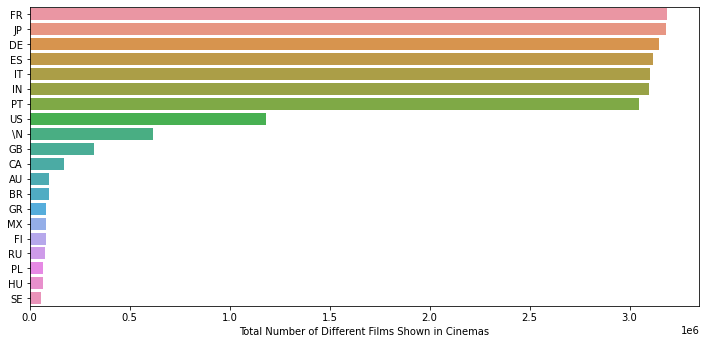

In [14]:
country_counts = title_akas.region.value_counts()
country_names = country_counts.drop(["XWW","XWG"]).index[:20]
counts = country_counts.drop(["XWW","XWG"]).values[:20]
plt.figure(figsize=(12,5.5))
sns.barplot(x=counts,y=country_names,orient="h")
plt.xlabel("Total Number of Different Films Shown in Cinemas")


## - la distribution des ages

In [81]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838773 entries, 0 to 10838772
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 496.2+ MB


In [82]:
df_name_basics=name_basics.dropna()

In [85]:
df_name_basics=df_name_basics[df_name_basics.birthYear != '\\N']

In [86]:
df_name_basics=df_name_basics[df_name_basics.deathYear != '\\N']

In [89]:
df_name_basics.birthYear=df_name_basics.birthYear.astype(int)
df_name_basics.deathYear=df_name_basics.deathYear.astype(int)

In [94]:
df_name_basics['esperance']=df_name_basics.deathYear-df_name_basics.birthYear
df_name_basics.sort_values('esperance', ascending=False)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,esperance
124435,nm0130625,Jeanne Louise Calment,1875,1997,soundtrack,"tt0081721,tt0128058",122
230796,nm0243164,Tatzumbia Dupea,1849,1970,actress,"tt0036677,tt0043262",121
6071259,nm4304013,Fakir Lalon Shah,1772,1890,"music_department,writer,soundtrack","tt2402716,tt0368678,tt5238654,tt3365690",118
4813478,nm2897088,Misao Ogawa,1898,2015,actress,tt1172226,117
261864,nm0275946,Gustave Field,1896,2012,"writer,assistant_director","tt0049219,tt0055666,tt0072471,tt0071054",116
...,...,...,...,...,...,...,...
917451,nm0993447,Grace Golden,1904,1903,actress,tt0285842,-1
372869,nm0393598,Michael Hook,1946,1913,"assistant_director,miscellaneous","tt0087414,tt0087469,tt0078346,tt0082971",-33
487586,nm0515385,Titus Livius,59,17,writer,tt0003740,-42
10441979,nm9543104,Viktor Cholnoky,1868,5,writer,\N,-1863


In [96]:
df_name_basics=df_name_basics[df_name_basics['esperance']>0]

In [97]:
df_name_basics.sort_values('esperance', ascending=False)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,esperance
124435,nm0130625,Jeanne Louise Calment,1875,1997,soundtrack,"tt0081721,tt0128058",122
230796,nm0243164,Tatzumbia Dupea,1849,1970,actress,"tt0036677,tt0043262",121
6071259,nm4304013,Fakir Lalon Shah,1772,1890,"music_department,writer,soundtrack","tt2402716,tt0368678,tt5238654,tt3365690",118
4813478,nm2897088,Misao Ogawa,1898,2015,actress,tt1172226,117
261864,nm0275946,Gustave Field,1896,2012,"writer,assistant_director","tt0049219,tt0055666,tt0072471,tt0071054",116
...,...,...,...,...,...,...,...
239451,nm0252323,Caryll Ann Ekelund,1935,1939,actress,tt0032264,4
7395752,nm5785061,Harry Whittaker,2011,2014,actor,"tt0068069,tt2126283",3
7156906,nm5513057,Murzylka,2009,2011,"actor,soundtrack,composer","tt2697400,tt4473096,tt3856316,tt4939036",2
9239762,nm8094452,Xavian Lee,2000,2001,actor,"tt4718836,tt4718822",1


In [128]:
df_name_basics.esperance.describe()

count    156429.000000
mean         70.880495
std          15.864404
min           1.000000
25%          61.000000
50%          73.000000
75%          83.000000
max         122.000000
Name: esperance, dtype: float64

C:\Users\simad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


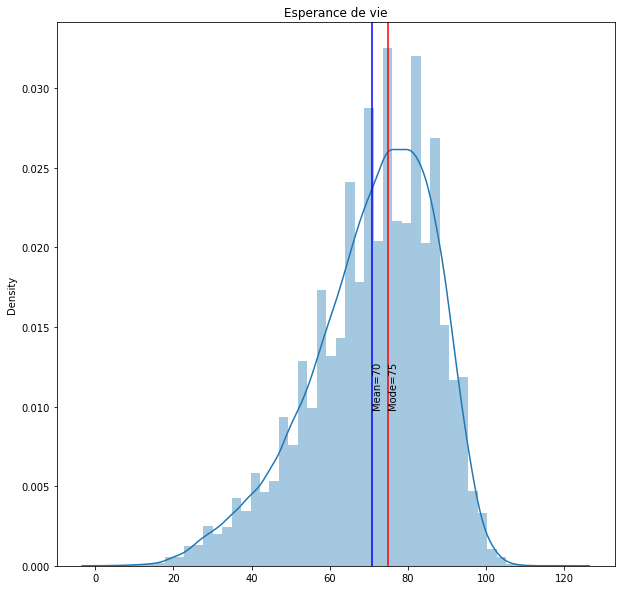

In [137]:
fig, ax = plt.subplots(figsize=(10,10))
ax1=sns.distplot(x=df_name_basics.esperance)
plt.title('Esperance de vie')
plt.axvline(75,0, color='r')
plt.text(75,0.010,'Mode=75',rotation=90)
plt.axvline(70.88, color='b')
plt.text(70.88,0.010,'Mean=70',rotation=90)
plt.show()

C:\Users\simad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


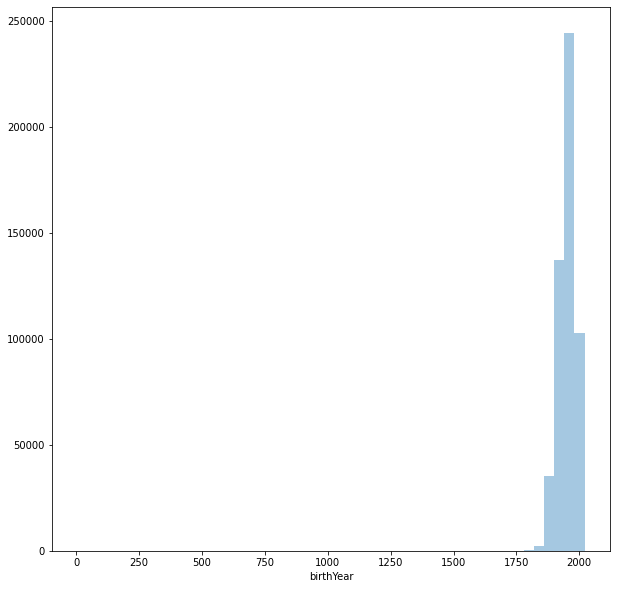

In [138]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(name_basics_no_nn,kde=False)
plt.show()

## Je lis les donnés de ma table pour trouver les quarties

In [14]:
table_Film_Rating_title[["averageRating", "numVotes"]].describe()

,averageRating,numVotes
count,3.434119e+06,3.434119e+06
mean,6.636495e+00,1.103767e+04
std,1.355231e+00,6.472926e+04
min,1.000000e+00,5.000000e+00
25%,5.900000e+00,1.300000e+01
50%,6.700000e+00,7.900000e+01
75%,7.500000e+00,9.520000e+02
max,1.000000e+01,2.371061e+06


In [15]:
title_akas['region'].value_counts().head(10)

FR    3189116
JP    3180582
DE    3144568
ES    3117840
IT    3101459
IN    3098368
PT    3045760
US    1182736
\N     616644
GB     320701
Name: region, dtype: int64

# un gros filtre region france, nm de vote 1500, rating supérieur à 6 et langues francaise
# (table_Film_Rating_title['language']=='en')
# (~table_film['genres'].str.contains("Adult"))] toute les collones qui ne contient pas adult

In [17]:
#On filtre sur region france, nm de vote 1500, rating supérieur à 6 et langues francaise
#& (table_Film_Rating_title['language']=='en')
#(~table_film['genres'].str.contains("Adult"))] toute les collones qui ne contient pas adult
table_film=table_Film_Rating_title[(table_Film_Rating_title['region']=='FR') & (table_Film_Rating_title['numVotes']>1500) & (table_Film_Rating_title['titleType']=="movie") & (table_Film_Rating_title['averageRating']>7) & (~table_Film_Rating_title['genres'].str.contains("Adult"))] 

TypeError: bad operand type for unary ~: 'float'

In [33]:
table_film.sort_values('averageRating', ascending=False)

NameError: name 'table_film' is not defined

In [32]:
table_film2=table_film=table_Film_Rating_title[(table_Film_Rating_title['region']=='FR')  & (table_Film_Rating_title['titleType']=="movie") & (table_Film_Rating_title['averageRating']>7) & (~table_film['genres'].str.contains("Adult"))] 


NameError: name 'table_Film_Rating_title' is not defined

In [82]:
Copy_table_film=table_film.copy()

In [83]:
Copy_table_film.drop_duplicates(subset ="tconst", inplace = True)

In [84]:
Copy_table_film.sort_values('averageRating', ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
814371,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2371061.0,tt0111161,12.0,Les Évadés,FR,\N,imdbDisplay,\N,0
473211,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1641939.0,tt0068646,50.0,Le parrain,FR,\N,imdbDisplay,\N,0
7799546,tt11989890,movie,David Attenborough: A Life on Our Planet,David Attenborough: A Life on Our Planet,0,2020,\N,83,"Biography,Documentary",9.0,25983.0,tt11989890,21.0,David Attenborough: Une vie sur notre planète,FR,\N,imdbDisplay,\N,0
297588,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,699696.0,tt0050083,16.0,Douze hommes en colère,FR,\N,\N,alternative spelling,0
499283,tt0071562,movie,The Godfather: Part II,The Godfather: Part II,0,1974,\N,202,"Crime,Drama",9.0,1143612.0,tt0071562,69.0,"Le parrain, 2ème partie",FR,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258144,tt0045883,movie,Hondo,Hondo,0,1953,\N,83,"Drama,Romance,War",7.1,9739.0,tt0045883,10.0,Hondo,FR,\N,\N,DVD box title,0
258243,tt0045888,movie,House of Wax,House of Wax,0,1953,\N,88,Horror,7.1,16405.0,tt0045888,39.0,L'Homme au masque de cire,FR,\N,imdbDisplay,\N,0
2818283,tt0896872,movie,The Whistleblower,The Whistleblower,0,2010,\N,112,"Biography,Crime,Drama",7.1,31974.0,tt0896872,32.0,Seule contre tous,FR,\N,imdbDisplay,\N,0
2794038,tt0889652,movie,Roman de gare,Roman de gare,0,2007,\N,103,Drama,7.1,2411.0,tt0889652,12.0,Roman de gare,FR,\N,\N,\N,0


In [69]:
Copy_table_film[(Copy_table_film['startYear']=='\\N')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle


In [30]:
Copy_table_film.sort_values('averageRating', ascending=False).head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
3049,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2371061.0,tt0111161,12.0,Les Évadés,FR,\N,imdbDisplay,\N,0
1853,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1641939.0,tt0068646,50.0,Le parrain,FR,\N,imdbDisplay,\N,0
4698,tt11989890,movie,David Attenborough: A Life on Our Planet,David Attenborough: A Life on Our Planet,0,2020,\N,83,"Biography,Documentary",9.0,25983.0,tt11989890,21.0,David Attenborough: Une vie sur notre planète,FR,\N,imdbDisplay,\N,0
1037,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,699696.0,tt0050083,16.0,Douze hommes en colère,FR,\N,\N,alternative spelling,0
1962,tt0071562,movie,The Godfather: Part II,The Godfather: Part II,0,1974,\N,202,"Crime,Drama",9.0,1143612.0,tt0071562,69.0,"Le parrain, 2ème partie",FR,\N,imdbDisplay,\N,0
4267,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2334544.0,tt0468569,38.0,The Dark Knight : Le Chevalier noir,FR,\N,imdbDisplay,\N,0
2971,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History",8.9,1226169.0,tt0108052,6.0,La liste de Schindler,FR,\N,imdbDisplay,\N,0
2416,tt0087349,movie,"Blue Mountains, or Unbelievable Story",Tsisperi mtebi anu daujerebeli ambavi,0,1983,\N,97,"Comedy,Drama",8.9,1734.0,tt0087349,15.0,Les montagnes bleues,FR,\N,imdbDisplay,\N,0
3471,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1660071.0,tt0167260,27.0,Le Seigneur des anneaux : Le Retour du roi,FR,\N,imdbDisplay,\N,0
3041,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1847449.0,tt0110912,15.0,Pulp Fiction,FR,\N,imdbDisplay,\N,0


In [66]:
Copy_table_film.to_csv("Copy_table_film.csv", index=False)


# j'archive le dataset pour le charger plus vite


In [2]:
Copy_table_film=pd.read_csv("Copy_table_film.csv")
Copy_table_film.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.1,2425.0,tt0002130,3.0,L'enfer,FR,\N,\N,\N,0
1,tt0003740,movie,Cabiria,Cabiria,0,1914,\N,148,"Adventure,Drama,History",7.1,3224.0,tt0003740,17.0,Cabiria,FR,\N,imdbDisplay,\N,0
2,tt0006206,movie,Les vampires,Les vampires,0,1915,\N,421,"Action,Adventure,Crime",7.3,4330.0,tt0006206,1.0,Les vampires,FR,\N,imdbDisplay,\N,0
3,tt0006864,movie,Intolerance: Love's Struggle Throughout the Ages,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History",7.7,14377.0,tt0006864,27.0,Intolérance,FR,\N,\N,\N,0
4,tt0008879,movie,The Outlaw and His Wife,Berg-Ejvind och hans hustru,0,1918,\N,136,Drama,7.2,1577.0,tt0008879,12.0,Les proscrits,FR,\N,\N,\N,0


In [3]:
Copy_table_film.shape

(6129, 19)

# je dois télécharger le dataset netflix et le retirer de ma liste

In [103]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [6]:
df_netflix_2018=pd.read_html('https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2018)', header=0)[0]
df_netflix_2019=pd.read_html('https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2019)', header=0)[0]
df_netflix_2020=pd.read_html('https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2020)', header=0)[0]
df_netflix_2015_2017=pd.read_html('https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2015%E2%80%932017)', header=0)[0]

In [7]:
df_netflix_2015_2017

,Title,Genre,Premiere,Runtime,Language
0,Beasts of No Nation,War drama,"October 16, 2015","2 hours, 16 min.",English/Akan
1,The Ridiculous 6,Western,"December 11, 2015","1 hour, 59 min.",English
2,Pee-wee's Big Holiday,Adventure,"March 18, 2016","1 hour, 29 min.",English
3,Special Correspondents,Satire,"April 29, 2016","1 hour, 40 min.",English
4,The Do-Over,Action comedy,"May 27, 2016","1 hour, 48 min.",English
5,The Fundamentals of Caring,Comedy-drama,"June 24, 2016","1 hour, 37 min.",English
6,Brahman Naman,Comedy,"July 7, 2016","1 hour, 35 min.",English
7,Rebirth,Thriller,"July 15, 2016","1 hour, 40 min.",English
8,Tallulah,Comedy-drama,"July 29, 2016","1 hour, 51 min.",English
9,XOXO,Drama,"August 26, 2016","1 hour, 32 min.",English


In [8]:
dfnetflix=pd.concat([df_netflix_2018,df_netflix_2019, df_netflix_2015_2017])

In [9]:
dfnetflix

,Title,Genre,Premiere,Runtime,Language
0,The Polka King,Comedy-drama,"January 12, 2018","1 hour, 35 min.",English
1,Step Sisters,Comedy,"January 19, 2018","1 hour, 48 min.",English
2,The Open House,Horror thriller,"January 19, 2018","1 hour, 34 min.",English
3,A Futile and Stupid Gesture,Biographical/Comedy,"January 26, 2018","1 hour, 41 min.",English
4,The Cloverfield Paradox,Science fiction,"February 4, 2018","1 hour, 42 min.",English
...,...,...,...,...,...
54,The Killer,Western,"November 10, 2017","1 hour, 39 min.",Portuguese
55,A Christmas Prince,Romantic comedy,"November 17, 2017","1 hour, 32 min.",English
56,El Camino Christmas,Dark comedy,"December 8, 2017","1 hour, 29 min.",English
57,Christmas Inheritance,Romantic drama,"December 15, 2017","1 hour, 44 min.",English


In [135]:
Copy_table_film[Copy_table_film['originalTitle'].str.contains('Irishman', case=True)]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
4771,tt1302006,movie,The Irishman,The Irishman,0,2019,\N,209,"Biography,Crime,Drama",7.8,332899.0,tt1302006,39.0,The Irishman,FR,\N,imdbDisplay,\N,0
4847,tt1416801,movie,Kill the Irishman,Kill the Irishman,0,2011,\N,106,"Biography,Crime,Drama",7.1,46235.0,tt1416801,23.0,Irish Gangster,FR,\N,alternative,\N,0


# je drop les colone en double et les colone dont je ne veux pas


In [10]:
copyDfNetflix=dfnetflix.copy()

In [25]:
copyDfNetflix.rename({'Title':'title', 'YEAR':'startYear' }, axis=1, inplace=True)


In [284]:
copyDfNetflix

,title,Genre,Premiere,Runtime,Language
0,The Polka King,Comedy-drama,"January 12, 2018","1 hour, 35 min.",English
1,Step Sisters,Comedy,"January 19, 2018","1 hour, 48 min.",English
2,The Open House,Horror thriller,"January 19, 2018","1 hour, 34 min.",English
3,A Futile and Stupid Gesture,Biographical/Comedy,"January 26, 2018","1 hour, 41 min.",English
4,The Cloverfield Paradox,Science fiction,"February 4, 2018","1 hour, 42 min.",English
...,...,...,...,...,...
54,The Killer,Western,"November 10, 2017","1 hour, 39 min.",Portuguese
55,A Christmas Prince,Romantic comedy,"November 17, 2017","1 hour, 32 min.",English
56,El Camino Christmas,Dark comedy,"December 8, 2017","1 hour, 29 min.",English
57,Christmas Inheritance,Romantic drama,"December 15, 2017","1 hour, 44 min.",English


In [12]:
copyDfNetflix['YEAR']=pd.DatetimeIndex(copyDfNetflix['Premiere']).year

In [13]:
copyDfNetflix

,title,Genre,Premiere,Runtime,Language,YEAR
0,The Polka King,Comedy-drama,"January 12, 2018","1 hour, 35 min.",English,2018
1,Step Sisters,Comedy,"January 19, 2018","1 hour, 48 min.",English,2018
2,The Open House,Horror thriller,"January 19, 2018","1 hour, 34 min.",English,2018
3,A Futile and Stupid Gesture,Biographical/Comedy,"January 26, 2018","1 hour, 41 min.",English,2018
4,The Cloverfield Paradox,Science fiction,"February 4, 2018","1 hour, 42 min.",English,2018
...,...,...,...,...,...,...
54,The Killer,Western,"November 10, 2017","1 hour, 39 min.",Portuguese,2017
55,A Christmas Prince,Romantic comedy,"November 17, 2017","1 hour, 32 min.",English,2017
56,El Camino Christmas,Dark comedy,"December 8, 2017","1 hour, 29 min.",English,2017
57,Christmas Inheritance,Romantic drama,"December 15, 2017","1 hour, 44 min.",English,2017


In [19]:
copyDfNetflix.drop(['Genre', 'Premiere'], axis=1, inplace=True)

In [26]:
copyDfNetflix

,title,startYear
0,The Polka King,2018
1,Step Sisters,2018
2,The Open House,2018
3,A Futile and Stupid Gesture,2018
4,The Cloverfield Paradox,2018
...,...,...
54,The Killer,2017
55,A Christmas Prince,2017
56,El Camino Christmas,2017
57,Christmas Inheritance,2017


In [290]:
copyDfNetflix[copyDfNetflix['title'].str.contains('Irishman')]

,title,Genre,Premiere,YEAR
63,The Irishman,Crime drama,"November 27, 2019",2019


In [107]:
df=pd.concat([copyDfNetflix,Copy_table_film])

In [108]:
df[df['title'].str.contains('Irishman', case= True)]


,title,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,region,language,types,attributes,isOriginalTitle
63,The Irishman,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771,The Irishman,2019,tt1302006,movie,The Irishman,The Irishman,0.0,\N,209.0,"Biography,Crime,Drama",7.8,332899.0,tt1302006,39.0,FR,\N,imdbDisplay,\N,0.0


In [109]:
df[df.duplicated('title')]

,title,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,region,language,types,attributes,isOriginalTitle
200,La veuve joyeuse,1934,tt0025493,movie,The Merry Widow,The Merry Widow,0.0,\N,99.0,"Comedy,Musical,Romance",7.2,2584.0,tt0025493,27.0,FR,\N,\N,\N,0.0
219,Les mains d'Orlac,1935,tt0026663,movie,Mad Love,Mad Love,0.0,\N,68.0,"Horror,Romance,Sci-Fi",7.3,4678.0,tt0026663,12.0,FR,\N,\N,\N,0.0
302,La patrouille de l'aube,1938,tt0030044,movie,The Dawn Patrol,The Dawn Patrol,0.0,\N,103.0,"Drama,War",7.5,2755.0,tt0030044,11.0,FR,\N,imdbDisplay,\N,0.0
335,Quasimodo,1939,tt0031455,movie,The Hunchback of Notre Dame,The Hunchback of Notre Dame,0.0,\N,117.0,"Drama,Romance",7.8,10473.0,tt0031455,13.0,FR,\N,\N,\N,0.0
389,Le voleur de Bagdad,1940,tt0033152,movie,The Thief of Bagdad,The Thief of Bagdad,0.0,\N,106.0,"Adventure,Family,Fantasy",7.4,12062.0,tt0033152,9.0,FR,\N,\N,\N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5960,Mon fils,2018,tt7628458,movie,Hadi Be Oglum,Hadi Be Oglum,0.0,\N,112.0,Drama,7.1,3057.0,tt7628458,6.0,FR,\N,imdbDisplay,\N,0.0
5961,Marriage Story,2019,tt7653254,movie,Marriage Story,Marriage Story,0.0,\N,137.0,"Comedy,Drama,Romance",7.9,254077.0,tt7653254,31.0,FR,\N,imdbDisplay,\N,0.0
5993,Paddleton,2019,tt8041276,movie,Paddleton,Paddleton,0.0,\N,89.0,"Comedy,Drama",7.2,11667.0,tt8041276,8.0,FR,\N,imdbDisplay,\N,0.0
6037,Dolemite Is My Name,2019,tt8526872,movie,Dolemite Is My Name,Dolemite Is My Name,0.0,\N,118.0,"Biography,Comedy,Drama",7.3,54833.0,tt8526872,19.0,FR,\N,imdbDisplay,\N,0.0


In [110]:
df.drop_duplicates(subset=['title'], keep=False, inplace=True)

In [111]:
df[df['title'].str.contains('Drive', case= False)]

,title,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,region,language,types,attributes,isOriginalTitle
2082,Taxi Driver,1976,tt0075314,movie,Taxi Driver,Taxi Driver,0.0,\N,114.0,"Crime,Drama",8.2,734540.0,tt0075314,16.0,FR,\N,imdbDisplay,\N,0.0
2137,Driver,1978,tt0077474,movie,The Driver,The Driver,0.0,\N,91.0,"Action,Crime,Thriller",7.2,14643.0,tt0077474,7.0,FR,\N,\N,\N,0.0
3470,Mulholland Drive,2001,tt0166924,movie,Mulholland Dr.,Mulholland Dr.,0.0,\N,147.0,"Drama,Mystery,Thriller",7.9,325887.0,tt0166924,6.0,FR,\N,\N,\N,0.0
5550,Baby Driver,2017,tt3890160,movie,Baby Driver,Baby Driver,0.0,\N,113.0,"Action,Crime,Drama",7.6,447099.0,tt3890160,5.0,FR,\N,imdbDisplay,\N,0.0
5891,A Taxi Driver,2017,tt6878038,movie,A Taxi Driver,Taeksi woonjunsa,0.0,\N,137.0,"Action,Drama,History",7.9,17274.0,tt6878038,12.0,FR,\N,imdbDisplay,\N,0.0
6090,Driveways,2019,tt9318280,movie,Driveways,Driveways,0.0,\N,83.0,Drama,7.3,3534.0,tt9318280,6.0,FR,\N,imdbDisplay,\N,0.0


In [112]:
df=df.dropna()
df=df.reset_index(drop=True)

In [113]:
df

,title,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,region,language,types,attributes,isOriginalTitle
0,Cabiria,1914,tt0003740,movie,Cabiria,Cabiria,0.0,\N,148.0,"Adventure,Drama,History",7.1,3224.0,tt0003740,17.0,FR,\N,imdbDisplay,\N,0.0
1,Intolérance,1916,tt0006864,movie,Intolerance: Love's Struggle Throughout the Ages,Intolerance: Love's Struggle Throughout the Ages,0.0,\N,163.0,"Drama,History",7.7,14377.0,tt0006864,27.0,FR,\N,\N,\N,0.0
2,Les proscrits,1918,tt0008879,movie,The Outlaw and His Wife,Berg-Ejvind och hans hustru,0.0,\N,136.0,Drama,7.2,1577.0,tt0008879,12.0,FR,\N,\N,\N,0.0
3,Miss Milliard,1919,tt0009893,movie,The Oyster Princess,Die Austernprinzessin,0.0,\N,60.0,Comedy,7.2,1699.0,tt0009893,10.0,FR,\N,imdbDisplay,\N,0.0
4,Le lys brisé,1919,tt0009968,movie,Broken Blossoms,Broken Blossoms or The Yellow Man and the Girl,0.0,\N,90.0,"Drama,Romance",7.3,9532.0,tt0009968,15.0,FR,\N,\N,\N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,La loi de Téhéran,2019,tt9817070,movie,Just 6.5,Metri Shesh Va Nim,0.0,\N,131.0,"Action,Crime,Drama",7.9,8786.0,tt9817070,12.0,FR,\N,imdbDisplay,\N,0.0
5959,Deux,2019,tt9845110,movie,Two of Us,Deux,0.0,\N,99.0,"Drama,Romance",7.1,1585.0,tt9845110,17.0,FR,\N,imdbDisplay,\N,0.0
5960,The Bee Gees: How Can You Mend a Broken Heart,2020,tt9850386,movie,The Bee Gees: How Can You Mend a Broken Heart,The Bee Gees: How Can You Mend a Broken Heart,0.0,\N,111.0,"Documentary,Music",8.2,2887.0,tt9850386,9.0,FR,\N,imdbDisplay,\N,0.0
5961,Le bonheur à tout prix,2019,tt9882084,movie,Chasing Happiness,Chasing Happiness,0.0,\N,96.0,"Biography,Documentary,Music",7.8,2011.0,tt9882084,16.0,FR,\N,imdbDisplay,\N,0.0


In [114]:
# je drop les collones que je veux pas pour faciliter la lecture
df=df.drop(['primaryTitle','originalTitle', 'isAdult','endYear','titleId','attributes','isOriginalTitle','types'], axis=1)

In [115]:
df.head()

,title,startYear,tconst,titleType,runtimeMinutes,genres,averageRating,numVotes,ordering,region,language
0,Cabiria,1914,tt0003740,movie,148.0,"Adventure,Drama,History",7.1,3224.0,17.0,FR,\N
1,Intolérance,1916,tt0006864,movie,163.0,"Drama,History",7.7,14377.0,27.0,FR,\N
2,Les proscrits,1918,tt0008879,movie,136.0,Drama,7.2,1577.0,12.0,FR,\N
3,Miss Milliard,1919,tt0009893,movie,60.0,Comedy,7.2,1699.0,10.0,FR,\N
4,Le lys brisé,1919,tt0009968,movie,90.0,"Drama,Romance",7.3,9532.0,15.0,FR,\N


In [125]:
Df_Title_Rating_Director=pd.merge(left=df, right=title_crew, on='tconst')
Df_Title_Rating_Director.head()

,title,startYear,tconst,titleType,runtimeMinutes,genres,averageRating,numVotes,ordering,region,language,directors,writers
0,Cabiria,1914,tt0003740,movie,148.0,"Adventure,Drama,History",7.1,3224.0,17.0,FR,\N,nm0665163,"nm0195339,nm0515385,nm0665163,nm0758215"
1,Intolérance,1916,tt0006864,movie,163.0,"Drama,History",7.7,14377.0,27.0,FR,\N,nm0000428,"nm0048512,nm0115218,nm0000428,nm0002616,nm0640..."
2,Les proscrits,1918,tt0008879,movie,136.0,Drama,7.2,1577.0,12.0,FR,\N,nm0803705,"nm0803705,nm0039377,nm2642082"
3,Miss Milliard,1919,tt0009893,movie,60.0,Comedy,7.2,1699.0,10.0,FR,\N,nm0523932,"nm0473134,nm0523932"
4,Le lys brisé,1919,tt0009968,movie,90.0,"Drama,Romance",7.3,9532.0,15.0,FR,\N,nm0000428,"nm0121885,nm0000428"


In [141]:
Df_Title_Rating_DirectorName=pd.merge(left=Df_Title_Rating_Director, right=name_basics, left_on='directors', right_on='nconst')
Df_Title_Rating_DirectorName.head()

,title,startYear,tconst,titleType,runtimeMinutes,genres,averageRating,numVotes,ordering,region,language,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,Cabiria,1914,tt0003740,movie,148.0,"Adventure,Drama,History",7.1,3224.0,17.0,FR,\N,nm0665163,"nm0195339,nm0515385,nm0665163,nm0758215",nm0665163,Giovanni Pastrone,1883,1959,"director,writer,producer","tt0006997,tt0350986,tt0003740,tt0173869"
1,Intolérance,1916,tt0006864,movie,163.0,"Drama,History",7.7,14377.0,27.0,FR,\N,nm0000428,"nm0048512,nm0115218,nm0000428,nm0002616,nm0640...",nm0000428,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
2,Le lys brisé,1919,tt0009968,movie,90.0,"Drama,Romance",7.3,9532.0,15.0,FR,\N,nm0000428,"nm0121885,nm0000428",nm0000428,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
3,À travers l'orage,1920,tt0011841,movie,145.0,"Drama,Romance",7.4,5098.0,11.0,FR,\N,nm0000428,"nm0662461,nm0103755,nm0342604,nm0446189,nm0000428",nm0000428,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
4,Les deux orphelines,1921,tt0012532,movie,150.0,"Drama,History,Romance",7.3,4797.0,6.0,FR,\N,nm0000428,"nm0257866,nm0180077,nm0000428",nm0000428,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"


In [142]:
Df_Title_Rating_DirectorName=Df_Title_Rating_DirectorName.drop(['directors', 'writers', 'nconst'], axis=1)

In [145]:
Df_Title_Rating_DirectorName

,title,startYear,tconst,titleType,runtimeMinutes,genres,averageRating,numVotes,ordering,region,language,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,Cabiria,1914,tt0003740,movie,148.0,"Adventure,Drama,History",7.1,3224.0,17.0,FR,\N,Giovanni Pastrone,1883,1959,"director,writer,producer","tt0006997,tt0350986,tt0003740,tt0173869"
1,Intolérance,1916,tt0006864,movie,163.0,"Drama,History",7.7,14377.0,27.0,FR,\N,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
2,Le lys brisé,1919,tt0009968,movie,90.0,"Drama,Romance",7.3,9532.0,15.0,FR,\N,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
3,À travers l'orage,1920,tt0011841,movie,145.0,"Drama,Romance",7.4,5098.0,11.0,FR,\N,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
4,Les deux orphelines,1921,tt0012532,movie,150.0,"Drama,History,Romance",7.3,4797.0,6.0,FR,\N,D.W. Griffith,1875,1948,"director,writer,producer","tt0006864,tt0010484,tt0009559,tt0004972"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,Le Colocataire,2019,tt9789686,movie,108.0,"Drama,Romance",7.4,2307.0,3.0,FR,\N,Marco Berger,1977,\N,"director,writer,editor","tt1408972,tt3919820,tt9789686,tt1796406"
5475,J'ai perdu mon corps,2019,tt9806192,movie,81.0,"Animation,Drama,Fantasy",7.6,27448.0,29.0,FR,\N,Jérémy Clapin,1974,\N,"writer,director,animation_department","tt3321358,tt2421764,tt9806192,tt1235926"
5476,La loi de Téhéran,2019,tt9817070,movie,131.0,"Action,Crime,Drama",7.9,8786.0,12.0,FR,\N,Saeed Roustayi,\N,\N,"writer,director,producer","tt6207956,tt5460658,tt9817070,tt9861926"
5477,Deux,2019,tt9845110,movie,99.0,"Drama,Romance",7.1,1585.0,17.0,FR,\N,Filippo Meneghetti,\N,\N,"writer,director,assistant_director","tt9845110,tt2447032,tt1054112,tt3454720"


In [152]:
df.to_csv('Df_Title_Rating_DirectorName.csv')

# j'ai une base clean :
# -sans netflix
# -1500+ vote plus et 
# -avreage note 7 plus

In [139]:
Df_Title_Rating_DirectorName=pd.read_csv('Df_Title_Rating_DirectorName.csv')

In [140]:
Df_Title_Rating_DirectorName

,Unnamed: 0,title,startYear,tconst,titleType,runtimeMinutes,genres,averageRating,numVotes,ordering,region,language
0,0,Cabiria,1914,tt0003740,movie,148.0,"Adventure,Drama,History",7.1,3224.0,17.0,FR,\N
1,1,Intolérance,1916,tt0006864,movie,163.0,"Drama,History",7.7,14377.0,27.0,FR,\N
2,2,Les proscrits,1918,tt0008879,movie,136.0,Drama,7.2,1577.0,12.0,FR,\N
3,3,Miss Milliard,1919,tt0009893,movie,60.0,Comedy,7.2,1699.0,10.0,FR,\N
4,4,Le lys brisé,1919,tt0009968,movie,90.0,"Drama,Romance",7.3,9532.0,15.0,FR,\N
...,...,...,...,...,...,...,...,...,...,...,...,...
5958,5958,La loi de Téhéran,2019,tt9817070,movie,131.0,"Action,Crime,Drama",7.9,8786.0,12.0,FR,\N
5959,5959,Deux,2019,tt9845110,movie,99.0,"Drama,Romance",7.1,1585.0,17.0,FR,\N
5960,5960,The Bee Gees: How Can You Mend a Broken Heart,2020,tt9850386,movie,111.0,"Documentary,Music",8.2,2887.0,9.0,FR,\N
5961,5961,Le bonheur à tout prix,2019,tt9882084,movie,96.0,"Biography,Documentary,Music",7.8,2011.0,16.0,FR,\N
